<a href="https://colab.research.google.com/github/HACKERDRUNK/coding-interview-university/blob/main/Insurance_Claims_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

assert sys.version_info >=(3,7)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Dowload and prepare data
data = pd.read_csv('/content/InsuranceDataset.csv')
# Create training and test sets




In [9]:
#import some necessary lib
import sys
assert sys.version_info >=(3,7)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import math as m
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
# Download the data from a file
df=pd.read_csv('InsuranceDataset.csv')
df

,age,sex,home,bmi,children,smoker,drinking,past claims
0,49.0,female,Kowloon,32.3,2.0,no,no,"72,433"
1,55.0,female,South NT,29.5,2.0,no,occasional,"79,358"
2,53.0,female,North NT,26.0,0.0,no,frequent,"67,628"
3,19.0,male,Hong Kong Island,33.2,0.0,no,occasional,"7,020"
4,59.0,male,Hong Kong Island,36.5,1.0,no,frequent,"82,368"
...,...,...,...,...,...,...,...,...
1336,56.0,male,Hong Kong Island,38.5,0.0,no,no,"73,688"
1337,24.0,female,North NT,32.1,0.0,no,occasional,"17,955"
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info

<bound method DataFrame.info of        age     sex              home   bmi  children smoker    drinking  \
0     49.0  female           Kowloon  32.3       2.0     no          no   
1     55.0  female          South NT  29.5       2.0     no  occasional   
2     53.0  female          North NT  26.0       0.0     no    frequent   
3     19.0    male  Hong Kong Island  33.2       0.0     no  occasional   
4     59.0    male  Hong Kong Island  36.5       1.0     no    frequent   
...    ...     ...               ...   ...       ...    ...         ...   
1336  56.0    male  Hong Kong Island  38.5       0.0     no          no   
1337  24.0  female          North NT  32.1       0.0     no  occasional   
1338   NaN     NaN               NaN   NaN       NaN    NaN         NaN   
1339   NaN     NaN               NaN   NaN       NaN    NaN         NaN   
1340   NaN     NaN               NaN   NaN       NaN    NaN         NaN   

     past claims  
0         72,433  
1         79,358  
2         

In [18]:
df['past claims']=df['past claims'].map(lambda x:str(x).replace(',',''))
df['past claims']=df['past claims'].astype(float)
df

,age,sex,home,bmi,children,smoker,drinking,past claims
0,49.0,female,Kowloon,32.3,2.0,no,no,72433.0
1,55.0,female,South NT,29.5,2.0,no,occasional,79358.0
2,53.0,female,North NT,26.0,0.0,no,frequent,67628.0
3,19.0,male,Hong Kong Island,33.2,0.0,no,occasional,7020.0
4,59.0,male,Hong Kong Island,36.5,1.0,no,frequent,82368.0
...,...,...,...,...,...,...,...,...
1336,56.0,male,Hong Kong Island,38.5,0.0,no,no,73688.0
1337,24.0,female,North NT,32.1,0.0,no,occasional,17955.0
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<bound method NDFrame.describe of 0       49.0
1       55.0
2       53.0
3       19.0
4       59.0
        ... 
1336    56.0
1337    24.0
1338     NaN
1339     NaN
1340     NaN
Name: age, Length: 1341, dtype: float64>

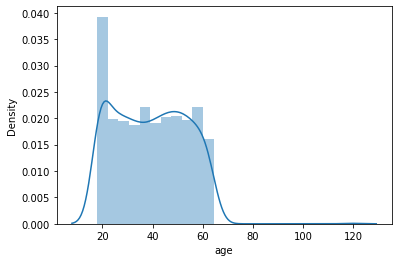

In [19]:
# Age analysis
sns.distplot(df.age)
df.age.describe

In [20]:
# Sex analysis
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [24]:
df.sex.value_counts()/len(df.sex)

male      0.504101
female    0.493661
Name: sex, dtype: float64

count    1338.000000
mean       29.738341
std         6.109329
min        14.800000
25%        25.400000
50%        29.500000
75%        33.600000
max        52.100000
Name: bmi, dtype: float64

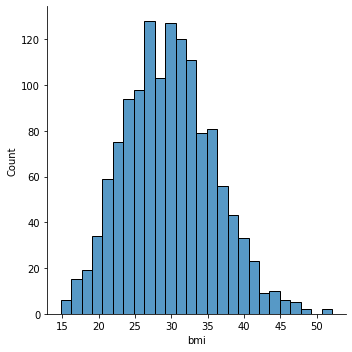

In [25]:
sns.displot(df.bmi)
df.bmi.describe()

In [26]:
#Children
df.children.value_counts()/len(df)

0.0    0.427293
1.0    0.241611
2.0    0.178225
3.0    0.116331
4.0    0.018643
5.0    0.013423
Name: children, dtype: float64

In [27]:
#Smoker
df.smoker.value_counts()/len(df)

no     0.793438
yes    0.204325
Name: smoker, dtype: float64

In [28]:
#Drinking
df.drinking.value_counts()/len(df)

occasional    0.596570
frequent      0.202088
no            0.199105
Name: drinking, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='past claims', ylabel='Density'>

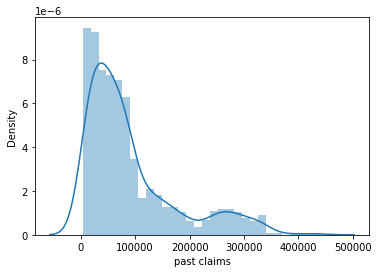

In [52]:
#Past Claims

sns.distplot(df['past claims'])

In [1]:
sns.distplot(df[df.smoker=='no'].drinking,label='Non Smoker'
sns.distplot(df[(df.smoker=='yes')&(df.past_claims < 30000)].drinking, label='Poor Smoker')
sns.distplot(df[(df.smoker=='yes')&(df.drinking > 30000)].drinking, label='Rich Smoker'

plt.legend()





SyntaxError: ignored

In [105]:
sns.distplot(df[df.smoker=='no'].drinking ,label='Non smoker'
plt.legend()

SyntaxError: ignored

In [82]:
#Less smoking, more children

df.groupby('smoker')['children'].value_counts()/df.groupby('smoker')['children'].count()


smoker  children
no      0.0         0.431668
        1.0         0.247879
        2.0         0.173421
        3.0         0.110273
        4.0         0.020735
        5.0         0.016023
yes     0.0         0.419708
        1.0         0.222628
        2.0         0.200730
        3.0         0.142336
        4.0         0.010949
        5.0         0.003650
Name: children, dtype: float64

In [92]:
#People whose older(60+),Smoking, has children

df[df.age>=60].groupby('smoker')['children'].value_counts()

smoker  children
no      0.0         64
        1.0          9
        3.0          8
        2.0          5
        4.0          1
yes     0.0         17
        1.0          4
        2.0          3
        3.0          3
Name: children, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='bmi'>

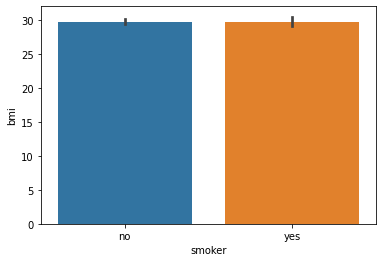

In [95]:
#Bmi&Smoking
sns.barplot(df.smoker,df.bmi)

In [96]:
#Who smoke more, Female or male
df.groupby('smoker')['sex'].value_counts()/df.groupby('smoker')['sex'].count()

smoker  sex   
no      female    0.514098
        male      0.485902
yes     male      0.580292
        female    0.419708
Name: sex, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='bmi'>

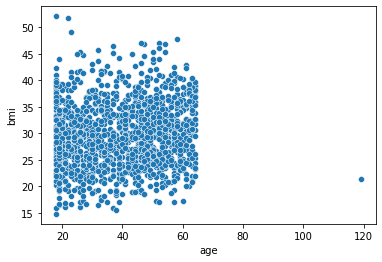

In [97]:
#How age impacts the BMI
#When the age increses, BMI increases, Your weight increases.

sns.scatterplot(df.age,df.bmi)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='drinking'>

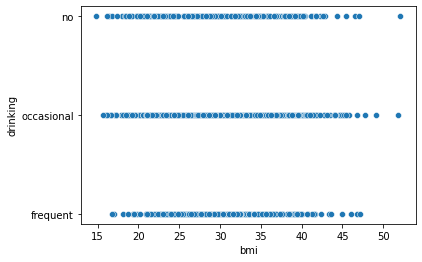

In [103]:
sns.scatterplot(df.bmi,df.drinking)

In [112]:
df.groupby('home')['past claims'].mean()

home
Hong Kong Island    inf
Kowloon             inf
North NT            inf
South NT            inf
Name: past claims, dtype: float64

In [114]:
df.groupby('home')['smoker'].value_counts() / df.groupby('home')['smoker'].count()

home              smoker
Hong Kong Island  no        0.821538
                  yes       0.178462
Kowloon           no        0.793210
                  yes       0.206790
North NT          no        0.821538
                  yes       0.178462
South NT          no        0.750000
                  yes       0.250000
Name: smoker, dtype: float64

In [116]:
df.groupby('home')['sex'].value_counts() / df.groupby('home')['smoker'].count()

home              sex   
Hong Kong Island  male      0.501538
                  female    0.498462
Kowloon           male      0.503086
                  female    0.496914
North NT          female    0.504615
                  male      0.495385
South NT          male      0.519231
                  female    0.480769
dtype: float64

Male and Female are almost equal numbers in these 4 areas.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='bmi'>

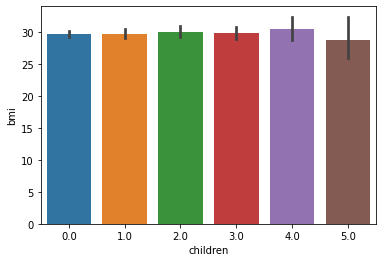

In [117]:
sns.barplot(df.children,df.bmi)

No connection between Bmi and children.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


sex
female    29.454834
male      30.015976
Name: bmi, dtype: float64

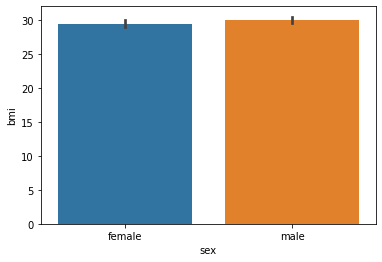

In [118]:
sns.barplot(df.sex,df.bmi)
df.groupby('sex')['bmi'].mean()


In [119]:
df.groupby('home')['bmi'].mean()

home
Hong Kong Island    29.655077
Kowloon             28.250926
North NT            28.296000
South NT            32.424451
Name: bmi, dtype: float64

In [120]:
df.groupby(['smoker','children'])['past claims'].mean()

smoker  children
no      0.0                   inf
        1.0                   inf
        2.0                   inf
        3.0                   inf
        4.0         5.244181e+112
        5.0          3.300554e+83
yes     0.0                   inf
        1.0                   inf
        2.0                   inf
        3.0         3.109491e+231
        4.0          9.364537e+16
        5.0          1.317200e+05
Name: past claims, dtype: float64

In [122]:
# df[(df.children>=3)&(df.smoker=='yes')]
df[(df.children>=4)&(df.smoker=='yes')]

,age,sex,home,bmi,children,smoker,drinking,past claims
154,37.0,male,Hong Kong Island,33.0,4.0,yes,no,280936
251,21.0,male,Hong Kong Island,24.5,4.0,yes,occasional,124522
634,39.0,female,Hong Kong Island,17.1,5.0,yes,occasional,131720
1291,32.0,male,North NT,27.4,4.0,yes,occasional,146593


Data prepartions

In [127]:
X=df[['age','sex','home','bmi','smoker','children','drinking']].copy()
X=sex=X.sex.map(lambda x:1 if x=='male'else 0)
X.smoker=X.smoker.map(lambda x:1 if x=='yes' else 0)
X=X.drop(['home'],axis=1)
lr=LinearRegression
y=df.charges
lr.fit(x,y)
y_hat=lr.predict(x)
residuals=y-y_hat

AttributeError: ignored

In [128]:
print('MSE:', mean_squared_error(y,y_hat)
print('RMSE:'mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_squared_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

SyntaxError: ignored

In [130]:
def adj_r2(y,y_hat,p)
r2=r2_score(y,y_hat)
n=len(y)
return 1 - (1-r2)*(n-1)/(n-p-1)


SyntaxError: ignored

In [131]:
adj_r2(y,y_hat,X.shape[1])

NameError: ignored

In [132]:
sns.pairplot(df.hue='smoker')

SyntaxError: ignored

In [19]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [47]:
# Covert Data
# data=data.dropna()
# data['past claims']=data['past claims'].map(lambda x:str(x).replace(',',''))

# data['sex'] = data['sex'].replace({'female': 'f', 'male': 'm'})
# print(set(data['home']))

# for home_name in set(data['home']):
#     data.loc[data['home'] == home_name, 'home'] = home_name.replace("'", "")



# print(set(data['home']))
# i=0
# for home_name in set(data['home']):
#   data.loc[data['home']==home_name,['home']]
#   i+=1
# print(index)



# #replace all occurrences of 'no' with 0, 'occasional' with 1, and 'frequent' with 2 in the 'drinking'
# data['smoker'].replace({'yes': 'Y', 'no': 'N'}, inplace=True)

# data['drinking'].replace({'no': 0, 'occasional': 1, 'frequent': 2}, inplace=True)

# data=data.dropna()
# data['past claims']=data['past claims'].map(lambda x:str(x).replace(',',''))


# data.loc[data['sex'] == 'male', 'sex'] = 'm'

# data.loc[data['smoker'] == 'yes', 'smoker'] = 'Y'
# data.loc[data['smoker'] == 'no', 'smoker'] = 'N'

# data.loc[data['drinking'] == 'no', 'drinking'] = 0
# data.loc[data['drinking'] == 'occasional', 'drinking'] = 1
# data.loc[data['drinking'] == 'frequent', 'drinking'] = 2

# print(data.head())

# # # Split the data into X and Y
# X = data.drop(columns=["age"])
# Y = data["age"]


# # Load data into X_train and Y_train
# # ...

# # Define the model and fit it to the training data
# model = LinearRegression()
# start = time.time()
# model.fit(X_train, Y_train)
# end = time.time(
# # Make predictions on the test data
# Y_pred = model.predict(X_test)

# # Evaluate the model's performance using mean squared error
# mse = mean_squared_error(Y_test, Y_pred)

# # Print the results
# print("Execution time: {:.2f} seconds".format(end - start))
# print("Mean squared error: {:.2f}".format(mse))

# # Display a sample of the predictions
# df = pd.DataFrame({'actual value': Y_test, 'predicted value': Y_pred}).head(20)
# print(df)





    age     sex              home   bmi  children smoker  drinking past claims
0  49.0  female           Kowloon  32.3       2.0      N         0       72433
1  55.0  female          South NT  29.5       2.0      N         1       79358
2  53.0  female          North NT  26.0       0.0      N         2       67628
3  19.0       m  Hong Kong Island  33.2       0.0      N         1        7020
4  59.0       m  Hong Kong Island  36.5       1.0      N         2       82368


<ipython-input-47-578302613629>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['past claims']=data['past claims'].map(lambda x:str(x).replace(',',''))
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [6]:
train = pd.read_csv('/content/InsuranceDataset.csv')
train.head()


,age,sex,home,bmi,children,smoker,drinking,past claims
0,49.0,female,Kowloon,32.3,2.0,no,no,"72,433"
1,55.0,female,South NT,29.5,2.0,no,occasional,"79,358"
2,53.0,female,North NT,26.0,0.0,no,frequent,"67,628"
3,19.0,male,Hong Kong Island,33.2,0.0,no,occasional,"7,020"
4,59.0,male,Hong Kong Island,36.5,1.0,no,frequent,"82,368"


In [7]:
print(train.info())
print('-'*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   float64
 1   sex          1338 non-null   object 
 2   home         1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   children     1335 non-null   float64
 5   smoker       1338 non-null   object 
 6   drinking     1338 non-null   object 
 7   past claims  1338 non-null   object 
dtypes: float64(3), object(5)
memory usage: 83.9+ KB
None
--------------------------------------------------


NameError: ignored

# New Section

# New Section